In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./Caco-2 Permeability Dataset/Filtered Data/3D_optimizable_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMILES    5940 non-null   object 
 1   logPapp   5940 non-null   float64
 2   priority  5940 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 139.3+ KB


In [3]:
df.describe()

,logPapp,priority
count,5940.000000,5940.000000
mean,0.649852,1.121044
std,0.786073,0.326206
min,-1.958607,1.000000
25%,0.145610,1.000000
50%,0.792392,1.000000
75%,1.269233,1.000000
max,2.490000,2.000000


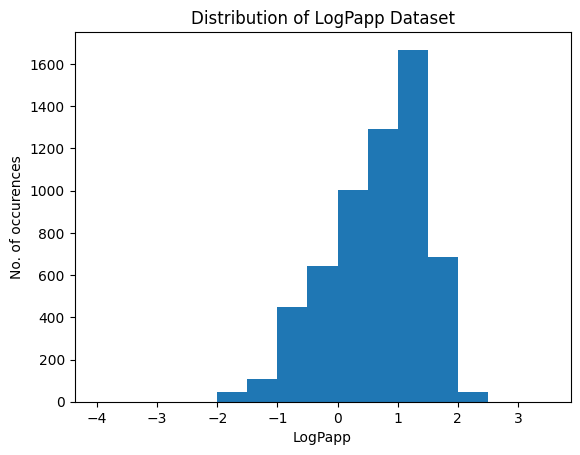

In [4]:
x = df['logPapp']
bins = [i for i in np.arange(-4.0, 3.6, 0.5)]
plt.hist(x, color='#1f77b4', bins = bins)
plt.xlabel('LogPapp')
plt.ylabel('No. of occurences')
plt.title('Distribution of LogPapp Dataset')
plt.show()

In [5]:
def calc_MW(smiles):
    mw = []
    mols = [Chem.MolFromSmiles(smi) for smi in df['SMILES']]
    for mol in mols:
        mw.append(Descriptors.ExactMolWt(mol))
    return mw

def calc_HBA(smiles):
    HBA = []
    mols = [Chem.MolFromSmiles(smi) for smi in df['SMILES']]
    for mol in mols:
        HBA.append(rdMolDescriptors.CalcNumHBA(mol))
    return HBA

def calc_HBD(smiles):
    HBD = []
    mols = [Chem.MolFromSmiles(smi) for smi in df['SMILES']]
    for mol in mols:
        HBD.append(rdMolDescriptors.CalcNumHBD(mol))
    return HBD

def calc_logP(smiles):
    logP = []
    mols = [Chem.MolFromSmiles(smi) for smi in df['SMILES']]
    for mol in mols:
        logP.append(rdMolDescriptors.CalcCrippenDescriptors(mol)[0])
    return logP
    
df['MolWeight'] = calc_MW(df['SMILES'])
df['HBA'] = calc_HBA(df['SMILES'])
df['HBD'] = calc_HBD(df['SMILES'])
df['logP'] = calc_logP(df['SMILES'])

In [6]:
df.describe()

,logPapp,priority,MolWeight,HBA,HBD,logP
count,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000
mean,0.649852,1.121044,455.503346,6.185690,2.141246,2.955891
std,0.786073,0.326206,147.662897,2.621623,1.889902,1.937744
min,-1.958607,1.000000,32.026215,0.000000,0.000000,-9.122100
25%,0.145610,1.000000,366.089211,5.000000,1.000000,2.007525
50%,0.792392,1.000000,444.131800,6.000000,2.000000,3.105720
75%,1.269233,1.000000,524.094200,7.000000,3.000000,4.126450
max,2.490000,2.000000,1908.799081,29.000000,24.000000,11.172800


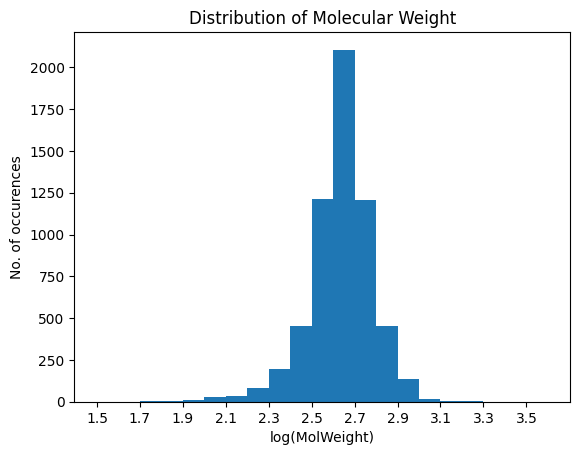

In [7]:
x = np.log10(df['MolWeight'])
plt.hist(x, bins=[i for i in np.arange(1.5, 3.65, 0.1)])
plt.xlabel('log(MolWeight)')
plt.ylabel('No. of occurences')
plt.title('Distribution of Molecular Weight')
plt.xticks([i for i in np.arange(1.5, 3.7, 0.2)])
plt.show()

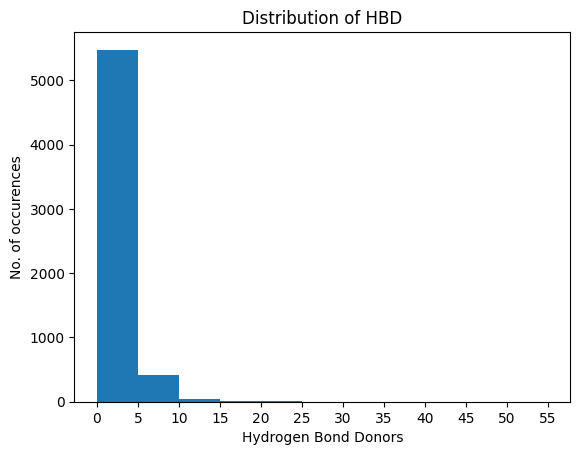

In [8]:
x = df['HBD']
plt.hist(x, bins=[i for i in range(0, 60, 5)])
plt.xlabel('Hydrogen Bond Donors')
plt.ylabel('No. of occurences')
plt.title('Distribution of HBD')
plt.xticks([i for i in range(0, 60, 5)])
plt.show()

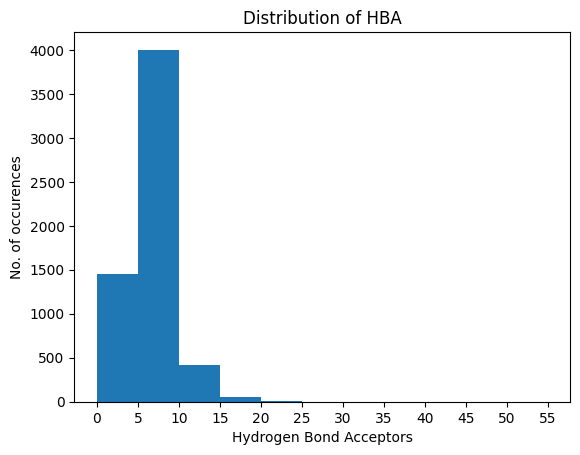

In [9]:
x = df['HBA']
plt.hist(x, bins=[i for i in range(0, 60, 5)])
plt.xlabel('Hydrogen Bond Acceptors')
plt.ylabel('No. of occurences')
plt.title('Distribution of HBA')
plt.xticks([i for i in range(0, 60, 5)])
plt.show()

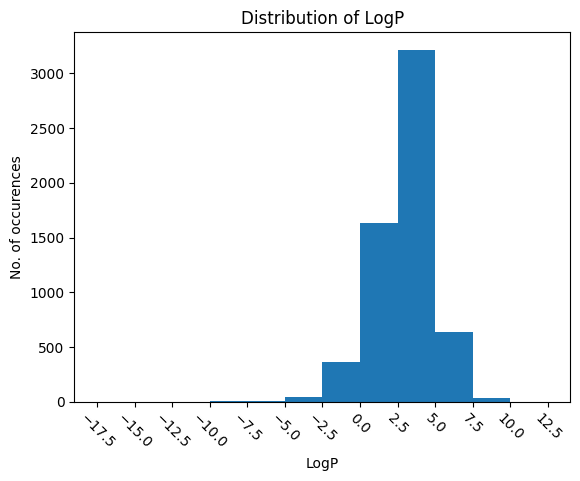

In [10]:
x = df['logP']
plt.hist(x, bins=[i for i in np.arange(-17.5, 12.6, 2.5)])
plt.xlabel('LogP')
plt.ylabel('No. of occurences')
plt.title('Distribution of LogP')
plt.xticks([i for i in np.arange(-17.5, 12.6, 2.5)], rotation=315)
plt.show()

In [11]:
# One criteria
criteria = [(df['MolWeight'] >= 500), (df['HBA'] >= 10), (df['HBD'] >= 5), (df['logP'] >= 5)]
name = ['MW', 'HBA', 'HBD', 'logP']

for idx, i in enumerate(criteria):
    outside_Ro5_i = df[i]
    print(f'For {name[idx]}: {len(outside_Ro5_i)} data points')

For MW: 1832 data points
For HBA: 482 data points
For HBD: 463 data points
For logP: 673 data points


In [12]:
# Two criteria
criteria = [(df['MolWeight'] >= 500), (df['HBA'] >= 10), (df['HBD'] >= 5), (df['logP'] >= 5)]
name = ['MW', 'HBA', 'HBD', 'logP']

for i in range(4):
    b = i+1
    while b != 4:
        outside_Ro5_i = df[criteria[i] & criteria[b]]
        print(f'For {name[i]} and {name[b]}: {len(outside_Ro5_i)} data points')
        b += 1

For MW and HBA: 386 data points
For MW and HBD: 307 data points
For MW and logP: 440 data points
For HBA and HBD: 128 data points
For HBA and logP: 52 data points
For HBD and logP: 9 data points


In [13]:
# Three criteria
A, B, C, D = (df['MolWeight'] >= 500), (df['HBA'] >= 10), (df['HBD'] >= 5), (df['logP'] >= 5)
a, b, c, d = 'MW', 'HBA', 'HBD', 'logP'

outside_Ro5_i = df[A & B & C]
print(f'For {a}, {b}, {c}: {len(outside_Ro5_i)} data points')

outside_Ro5_i = df[A & C & D]
print(f'For {a}, {c}, {d}: {len(outside_Ro5_i)} data points')

outside_Ro5_i = df[A & B & D]
print(f'For {a}, {b}, {d}: {len(outside_Ro5_i)} data points')

outside_Ro5_i = df[B & C & D]
print(f'For {b}, {c}, {d}: {len(outside_Ro5_i)} data points')

For MW, HBA, HBD: 103 data points
For MW, HBD, logP: 9 data points
For MW, HBA, logP: 52 data points
For HBA, HBD, logP: 4 data points


In [14]:
# All criterias
outside_Ro5_conditions = (df['MolWeight'] >= 500) & (df['HBA'] >= 10) & (df['HBD'] >= 5) & (df['logP'] >= 5)
outside_Ro5 = df[outside_Ro5_conditions]
print(f'For {a}, {b}, {c}, {d}: {len(outside_Ro5)} data points')

For MW, HBA, HBD, logP: 4 data points


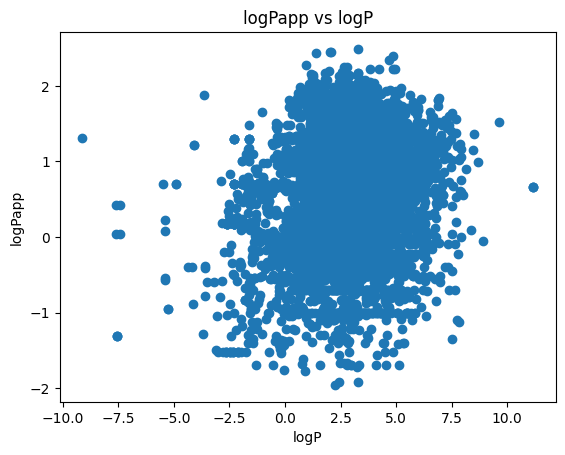

In [8]:
# Observing correlation between LogPapp and Ro5 properties
x = df['logP']
y = df['logPapp']

plt.scatter(x, y)
plt.title('logPapp vs logP')
plt.xlabel('logP')
plt.ylabel('logPapp')
plt.show()

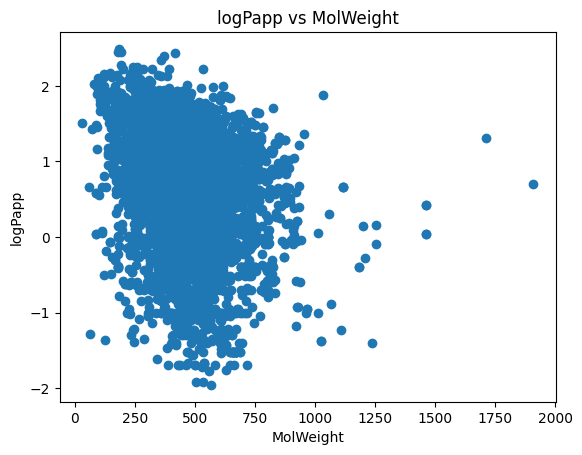

In [9]:
x = df['MolWeight']
y = df['logPapp']

plt.scatter(x, y)
plt.title('logPapp vs MolWeight')
plt.xlabel('MolWeight')
plt.ylabel('logPapp')
plt.show()

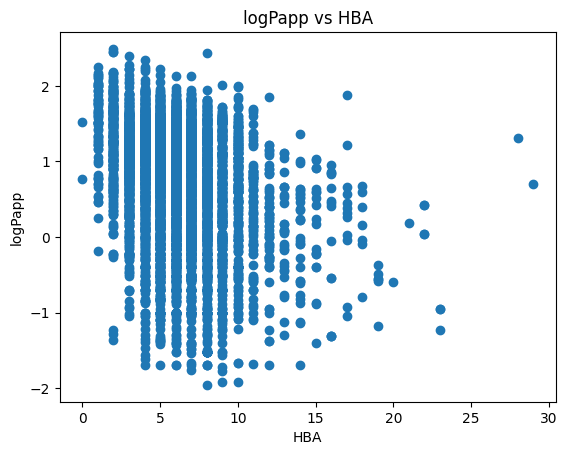

In [10]:
x = df['HBA']
y = df['logPapp']

plt.scatter(x, y)
plt.title('logPapp vs HBA')
plt.xlabel('HBA')
plt.ylabel('logPapp')
plt.show()

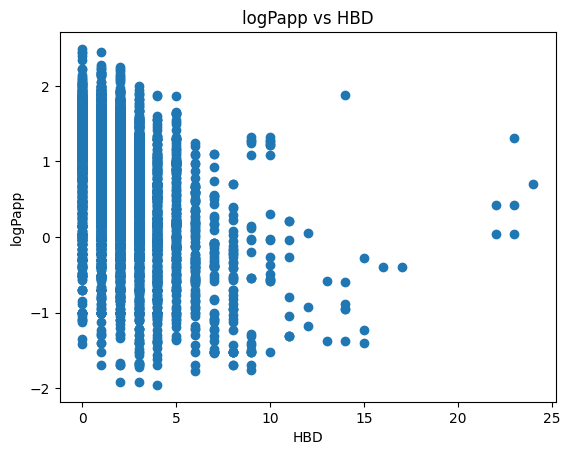

In [11]:
x = df['HBD']
y = df['logPapp']

plt.scatter(x, y)
plt.title('logPapp vs HBD')
plt.xlabel('HBD')
plt.ylabel('logPapp')
plt.show()

In [13]:
df.head(5)

,SMILES,logPapp,priority,MolWeight,HBA,HBD,logP
0,C=CCn1c(=O)c2cccnc2n(CC=C)c1=O,1.957607,1,243.100777,5,0,0.93020
1,N#CCc1ccccc1C#Cc1ccc(CCC(=O)O)cc1,1.959041,1,289.110279,2,1,3.16968
2,CCC(=O)N[C@H]1CC[C@@H](C(=O)N(C)c2ccc(-c3nc4cc...,1.973128,1,391.189592,4,1,4.15250
3,c1csc([C@]23CNC[C@H]2C3)c1,1.245513,1,165.061220,2,1,1.60900
4,c1cnc2ccc(Cn3nnc4nccnc43)cc2c1,1.607455,1,262.096694,6,0,1.81780


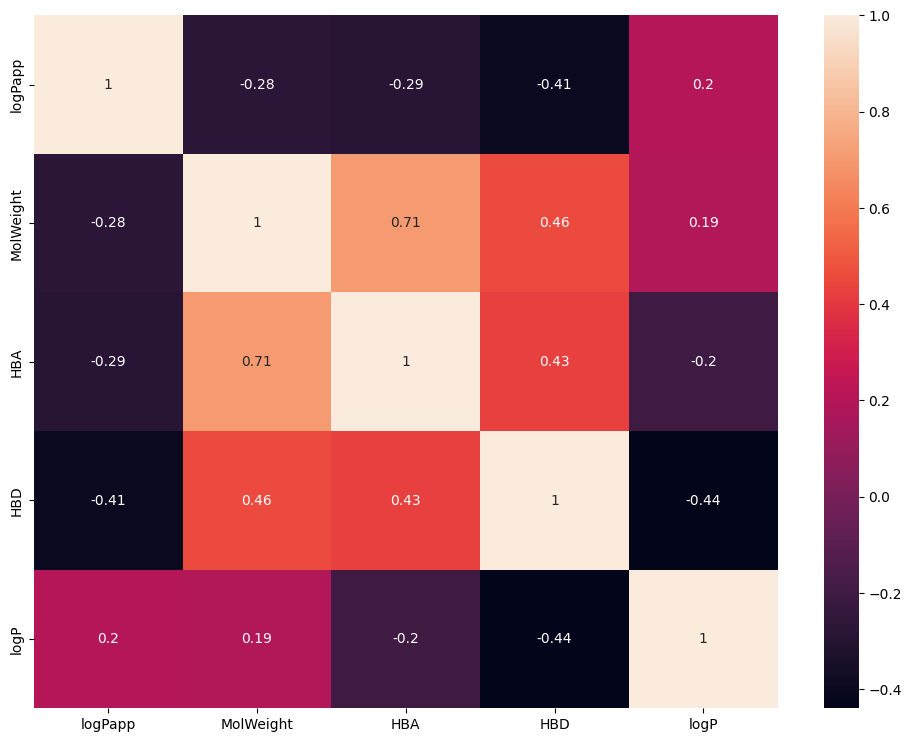

In [14]:
corr = df.drop(columns=['SMILES', 'priority']).corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True)
plt.show()
# no strong correlation between logPapp and Ro5 properties. 
# Traditionally, permeability is influenced by logP (higher hydrophobicity = higher membrane permeability).
# No correlation suggests that dataset contains ample examples of drug facilitated by active transport.